In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Create your desiere objective_function

In [18]:
def objective_function(x1, x2):
    foo = (-20) * np.exp(-0.2 * np.sqrt((x1**2 + x2**2) / 2) ) - np.exp((np.cos(np.pi * x1) + np.cos(np.pi * x2) / 2)) + 20 + np.exp(1)
    return foo



### It depend on your proplem to choose best fitness function
#### In this example, we want to found minimum of objective_function

In [3]:
def fitness_function(x1, x2):
    
    return 950 - objective_function(x1, x2)
    
        

In [4]:
def create_population(N, M, low, high): # increse x low and high
    population = []
    while N != 0:
        x1 = np.random.uniform(low=low[0], high=high[0])
        x2 = np.random.uniform(low=low[1], high=high[1])
        population.append((x1, x2))
        N -= 1
    return np.array(population)

In [7]:
def evaluate(population:np.ndarray):
    rs = []
    results = []
    for chromosome in population:        
        result = fitness_function(chromosome[0], chromosome[1]) # it denpend on chromosme length
        results.append(result)
        
    
    best_fit = np.max(results)
    avg = np.mean(results)
    
    
    index = results.index(best_fit)
    c = population[index]
    

    
    print(f"best fit: {best_fit}")
    print(f"mean fit: {avg} ")
    print("Chromosome: ", c ,"Result: ", objective_function(c[0], c[1]))
    
    
    
    return np.array(results), best_fit, avg 


### Parent selection with roulette wheel
#### You can create your PS

In [11]:
def parent_selection(evaluate_list:np.ndarray, population: np.ndarray, N): # PS with roulette wheel
    selections = []
    props = [res / evaluate_list.sum() for res in evaluate_list]
    while len(selections) < N:
        item = np.random.choice(props, p=props)
        index = props.index(item)
        selections.append(population[index])
    return selections

#### One point crossover

In [13]:
def cross_over_1(parent_selection:list, pc):
    next_generation = []
    while len(parent_selection) != 0:
        p1 = parent_selection.pop(np.random.randint(0, len(parent_selection)))
        p2 = parent_selection.pop(np.random.randint(0, len(parent_selection)))
        random_ = np.random.rand()
        
        if random_ < p:
            
            split = np.random.randint(0, CHROMOSOME_LENGTH + 1)
            ch1 = np.concatenate((p1[:split], p2[split:]))
            ch2 = np.concatenate((p2[:split], p1[split:]))
            next_generation.append(ch1)
            next_generation.append(ch2)
            
        else:
            
            next_generation.append(p1)
            next_generation.append(p2)
    
    return next_generation
    


#### Cross over with lambda 1 and lambda 2

In [15]:
def cross_over_2(parent_selection, l1, l2, p):
    next_generation = []
    cross = 0
    transform = 0
    while len(parent_selection) != 0:
        p1 = parent_selection.pop(np.random.randint(0, len(parent_selection)))
        p2 = parent_selection.pop(np.random.randint(0, len(parent_selection)))
        randome_ = np.random.rand()
        
        if randome_ < p:
            
            ch1 = [l1 * i + l2 * j for i, j in zip(p1, p2)]
            ch2 = [l1 * i + l2 * j for i, j in zip(p2, p1)]
            
            
            next_generation.append(ch1)
            next_generation.append(ch2)
            
            cross += 1
            
        else:
            
            next_generation.append(p1)
            next_generation.append(p2)
            
            transform += 1
    
    # some information about crossover
            
    print(f"number of cross: {cross}")
    print(f"number of transform: {transform}")
    
    return next_generation


In [16]:
def mutation(pm, N, M, next_gen, scale):
    randome_ = np.random.rand()
    if randome_ < pm:
        i = np.random.randint(0, N)
        j = np.random.randint(0, M)
        
        old = next_gen[i][j]
        old_ = next_gen[i]
        
        next_gen[i][j] = next_gen[i][j] + np.random.normal(scale=scale)
        
        print(f"mutation chromosme {old_} from {old} to {next_gen[i][j]}")
    else:
        print("no muation")
        
    return next_gen

### Initialize values and start algorithm

In [19]:
POPULATION = 80
CHROMOSOME_LENGTH = 2
PC = 0.3
PM = 0.2
SCALE = 0.2
L1 = 0.3
L2 = 0.7
ITER = 100
LOW = [-33, -33]
HIGH = [33, 33]

foo = 2


the_bests = []
gen_avg = []


population = create_population(POPULATION, CHROMOSOME_LENGTH, LOW, HIGH )
generation = 0
while generation != ITER:
    print(f"=============== generation {generation}")
    
    
    ev, best_fit, avg = evaluate(population)
    
    the_bests.append(best_fit)
    gen_avg.append(avg)
    foo = best_fit
    
    ps = parent_selection(ev, population, POPULATION)
    next_gen = cross_over_2(ps, L1, L2, PC)
    ngm = mutation(PM, POPULATION, CHROMOSOME_LENGTH, next_gen, SCALE)
    
    
    population = list(population)
    for i in ngm:
        population.append(list(i))
    
    population = np.array(population)
    
    # if you have break condition, set it here
    
#     if foo > 1.9:
#         break
    
    
    generation += 1
    

    


=============== generation 0
best fit: 942.1652865452041
mean fit: 930.2919702961942 
Chromosome:  [3.86108386 2.01266268] Result:  7.834713454795821
number of cross: 11
number of transform: 29
mutation chromosme [-29.85792019 -20.72460057] from -20.706003640444784 to -20.72460056938562
=============== generation 1
best fit: 942.1652865452041
mean fit: 930.2743982343738 
Chromosome:  [3.86108386 2.01266268] Result:  7.834713454795821
number of cross: 11
number of transform: 29
no muation
=============== generation 2
best fit: 942.1652865452041
mean fit: 930.2644709992409 
Chromosome:  [3.86108386 2.01266268] Result:  7.834713454795821
number of cross: 15
number of transform: 25
no muation
=============== generation 3
best fit: 942.1652865452041
mean fit: 930.3196992821302 
Chromosome:  [3.86108386 2.01266268] Result:  7.834713454795821
number of cross: 10
number of transform: 30
no muation
=============== generation 4
best fit: 942.1652865452041
mean fit: 930.3465724095237 
Chromosome:

best fit: 946.4048796470665
mean fit: 931.2051321709324 
Chromosome:  [ 0.42592843 -0.59441743] Result:  3.595120352933439
number of cross: 11
number of transform: 29
no muation
=============== generation 37
best fit: 946.4048796470665
mean fit: 931.2050046827785 
Chromosome:  [ 0.42592843 -0.59441743] Result:  3.595120352933439
number of cross: 14
number of transform: 26
no muation
=============== generation 38
best fit: 946.4048796470665
mean fit: 931.2382277165365 
Chromosome:  [ 0.42592843 -0.59441743] Result:  3.595120352933439
number of cross: 9
number of transform: 31
no muation
=============== generation 39
best fit: 947.0149228745486
mean fit: 931.2437545281412 
Chromosome:  [-0.32405314  0.57251723] Result:  2.9850771254514723
number of cross: 18
number of transform: 22
no muation
=============== generation 40
best fit: 947.0149228745486
mean fit: 931.2633724189672 
Chromosome:  [-0.32405314  0.57251723] Result:  2.9850771254514723
number of cross: 14
number of transform: 26


number of cross: 15
number of transform: 25
no muation
=============== generation 72
best fit: 951.3618393950272
mean fit: 931.4607725184221 
Chromosome:  [0.08091089 0.03443952] Result:  -1.36183939502726
number of cross: 17
number of transform: 23
no muation
=============== generation 73
best fit: 951.3618393950272
mean fit: 931.4777759049443 
Chromosome:  [0.08091089 0.03443952] Result:  -1.36183939502726
number of cross: 9
number of transform: 31
no muation
=============== generation 74
best fit: 951.3618393950272
mean fit: 931.4771999676316 
Chromosome:  [0.08091089 0.03443952] Result:  -1.36183939502726
number of cross: 12
number of transform: 28
mutation chromosme [-2.3496867  2.2789987] from -2.614895233242251 to -2.349686699365481
=============== generation 75
best fit: 951.3618393950272
mean fit: 931.4819541133674 
Chromosome:  [0.08091089 0.03443952] Result:  -1.36183939502726
number of cross: 18
number of transform: 22
no muation
=============== generation 76
best fit: 951.

### Visiual best_fitness - generation

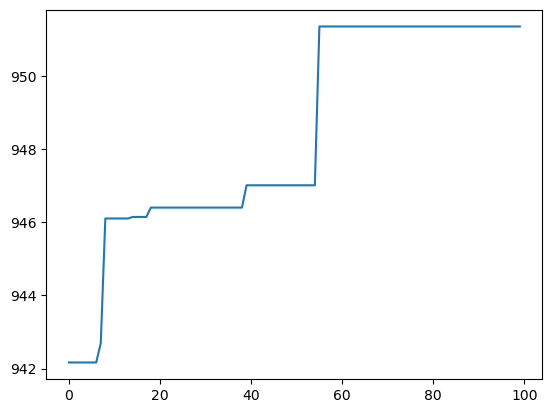

In [23]:
fig, ax = plt.subplots()
ax.plot(range(generation ), the_bests) # range(generation + 1)
plt.show()

### Visual fitness_avg - generation

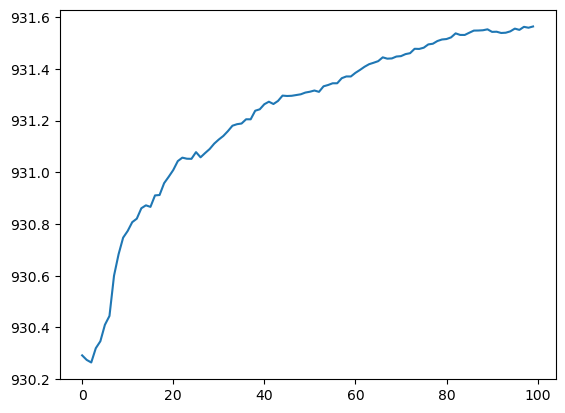

In [24]:
fig, ax = plt.subplots()
ax.plot(range(generation), gen_avg)
plt.show()